# Plotting
McStasScript includes a [plotting](../_autosummary/mcstasscript.interface.plotter.rst) module meant for plotting McStasScript data objects. 

## Example instrument
First an example instrument is constructed to provide some data for plotting examples.

In [2]:
from mcstasscript.interface import instr, functions, plotter
instrument = instr.McStas_instr("data_example")

source = instrument.add_component("source", "Source_simple")
source.set_parameters(xwidth=0.05, yheight=0.03, dlambda=0.02,
                      dist=5, focus_xw=0.015, focus_yh=0.03)
source.lambda0 = instrument.add_parameter("wavelength", value=2.0)

sample = instrument.add_component("sample", "PowderN")
sample.set_parameters(radius=source.focus_xw, yheight=0.8*source.focus_yh,
                      reflections='"Na2Ca3Al2F14.laz"')
sample.set_AT(source.dist, RELATIVE=source)

banana = instrument.add_component("banana", "Monitor_nD", RELATIVE=sample)
banana.set_parameters(xwidth=1.5, yheight=0.4, restore_neutron=1, filename='"banana.dat"')
banana.options = '"theta limits=[5 175] bins=250, banana"'

mon = instrument.add_component("PSD", "PSD_monitor")
mon.set_AT(0.1, RELATIVE=sample)
mon.set_parameters(nx=100, ny=100, filename='"psd.dat"',
                   xwidth=5*sample.radius, yheight=2*sample.yheight, restore_neutron=1)

### Performing the simulation
Here the simulation is performed to provide the example data.

In [9]:
instrument.settings(ncount=1E6, output_path="plotting_example")
instrument.set_parameters(wavelength=1.5)
instrument.backengine()
data = instrument.data

INFO: Using directory: "/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/user_guide/plotting_example_12"
INFO: Regenerating c-file: data_example.c
CFLAGS=
INFO: Recompiling: ./data_example.out
mccode-r.c:2837:3: warning: expression result unused [-Wunused-value]
  *t0;
  ^~~
1 warning generated.
INFO: ===
         (negative time, miss next components, rounding errors, Nan, Inf).
INFO: Placing instr file copy data_example.instr in dataset /Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript/docs/source/user_guide/plotting_example_12

      Opening input file '/Applications/McStas-2.7.1.app/Contents/Resources/mcstas/2.7.1//data/Na2Ca3Al2F14.laz' (Table_Read_Offset)
Table from file 'Na2Ca3Al2F14.laz' (block 1) is 841 x 18 (x=1:20), constant step. interpolation: linear
  '# TITLE *-Na2Ca3Al2F14-[I213] Courbion, G.;Ferey, G.[1988] Standard NAC cal ...'
PowderN: sample: Reading 841 rows from Na2Ca3Al2F14.laz
PowderN: sample: Read 841 reflections from file 'Na2

In [10]:
print(data)

[
McStasData: banana type: 1D  I:1.13353e-07 E:8.60125e-10 N:61381, 
McStasData: PSD type: 2D  I:9.76188e-06 E:2.05626e-08 N:570953]


## make_plot and make_sub_plot
The first available plotter is [*make_plot*](../_autosummary/mcstasscript.interface.plotter.make_plot.rst), it makes a single figure for each [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) set given in the input.

Plotting data with name banana
Plotting data with name PSD


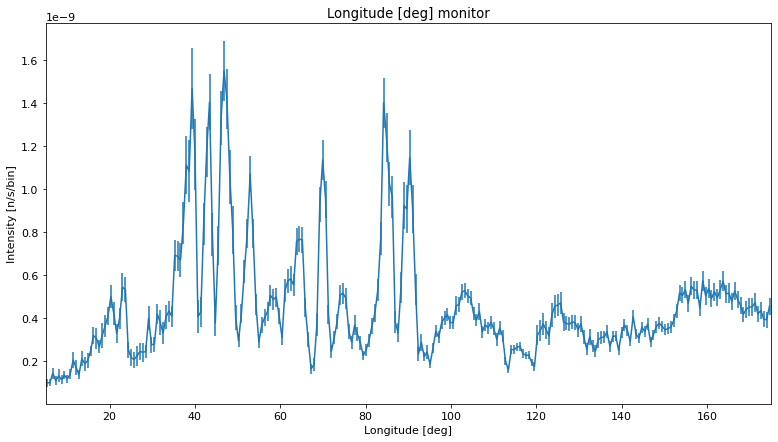

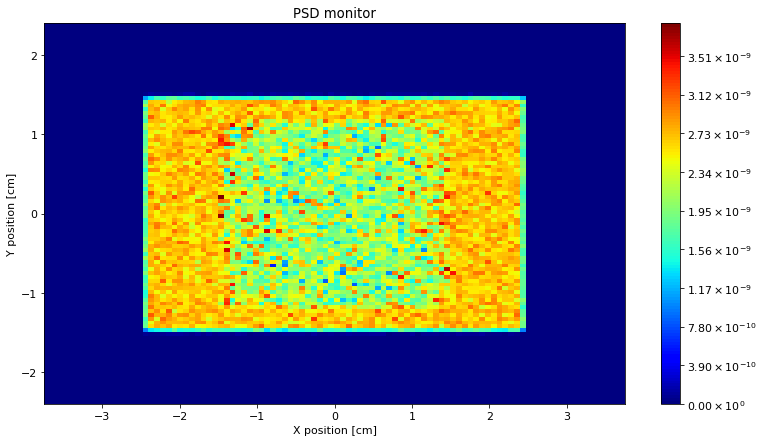

In [11]:
plotter.make_plot(data)

The second available plotter is [*make_sub_plot*](../_autosummary/mcstasscript.interface.plotter.make_sub_plot.rst), it makes a single figure that includes plot of all given [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) as subplots. This works best with between 1 and 9 monitors, as more tend to become difficult to read.

Plotting data with name banana
Plotting data with name PSD


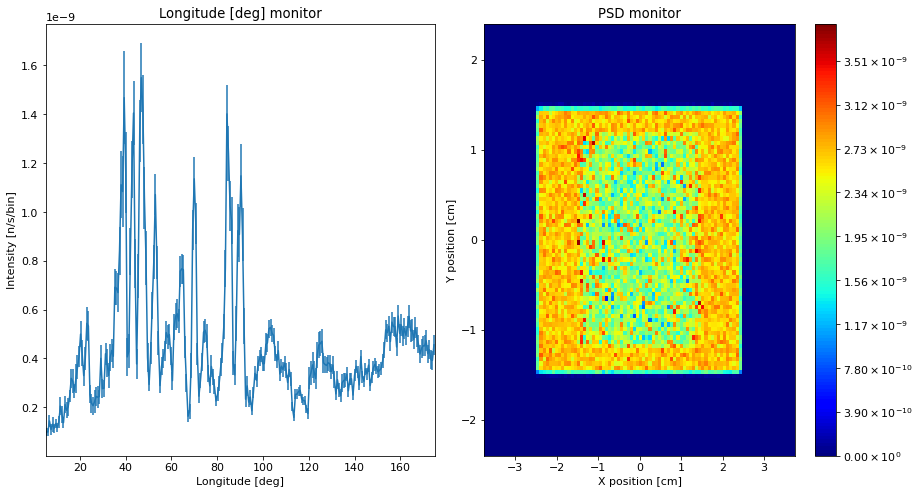

In [12]:
plotter.make_sub_plot(data)

## Customizing plots
As described in the data section of the documentation, the [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) objects contain preferences on how they should be plotted. The same keywords can however be given to the plotters to override these preferences. When plotting a list of [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst) objects, a list can be given for each keyword.

Plotting data with name banana
Plotting data with name PSD


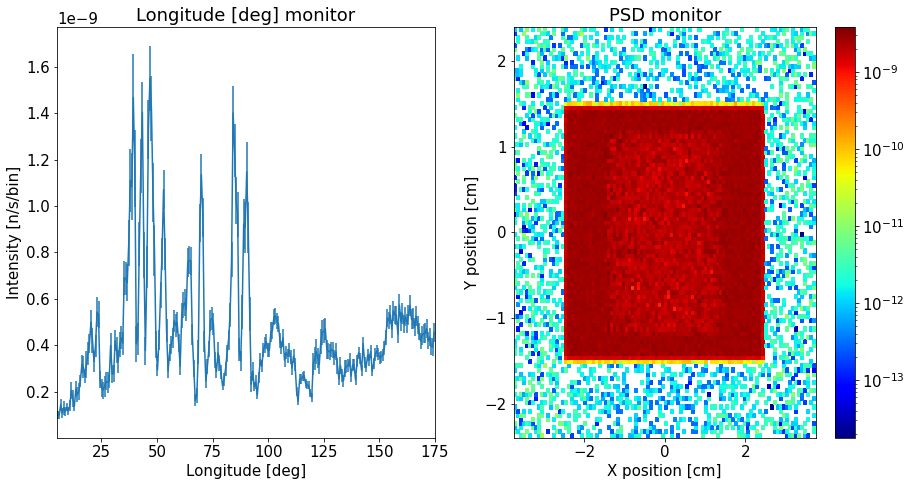

In [14]:
plotter.make_sub_plot(data, log=[False, True], fontsize=15)

### Available keywords
The keywords available to customize plotting are the same as can be set for *plot_options* in [McStasData](../_autosummary/mcstasscript.data.data.McStasData.rst). There are however a few additional keywords for controlling figure size and fontsize.

| Keyword argument | Type | Default | Description |
| --- | --- | --- | --- |
| figsize | tuple | (13, 7) | Tuple describing figure size |
| fontsize | int | 11 | Fontsize to use in plotting |
| log | bool | False | Logarithmic axis for y in 1D or z in 2D |
| orders_of_mag | float | 300 | Maximum orders of magnitude to plot in 2D |
| colormap | str | "jet" | Matplotlib colormap to use |
| show_colorbar | bool | True | Show the colorbar |
| x_axis_multiplier | float | 1 | Multiplier for x axis data |
| y_axis_multiplier | float | 1 | Multiplier for y axis data |
| cut_min | float | 0 | Unitless lower limit normalized to data range |
| cut_max | float | 1 | Unitless upper limit normalized to data range |
| left_lim | float | | Lower limit to plot range of x axis |
| right_lim | float | | Upper limit to plot range of x axis|
| bottom_lim | float | | Lower limit to plot range of y axis|
| top_lim | float | | Upper limit to plot range of y axis|